   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

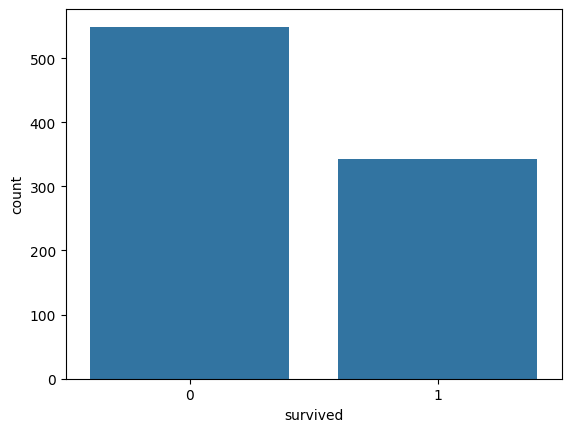

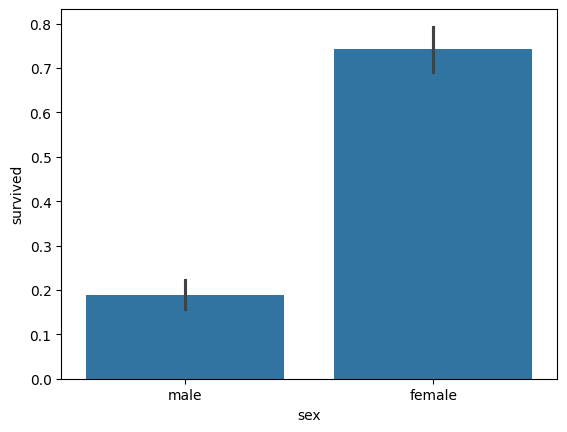

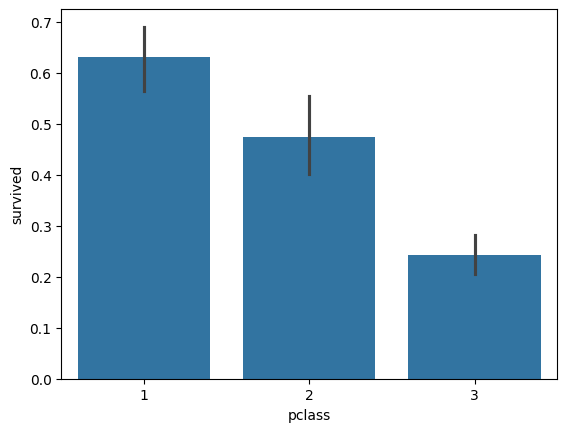

C:\Users\HP\AppData\Local\Temp\ipykernel_13032\3638143762.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)       # remplacer âge manquant
C:\Users\HP\AppData\Local\Temp\ipykernel_13032\3638143762.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

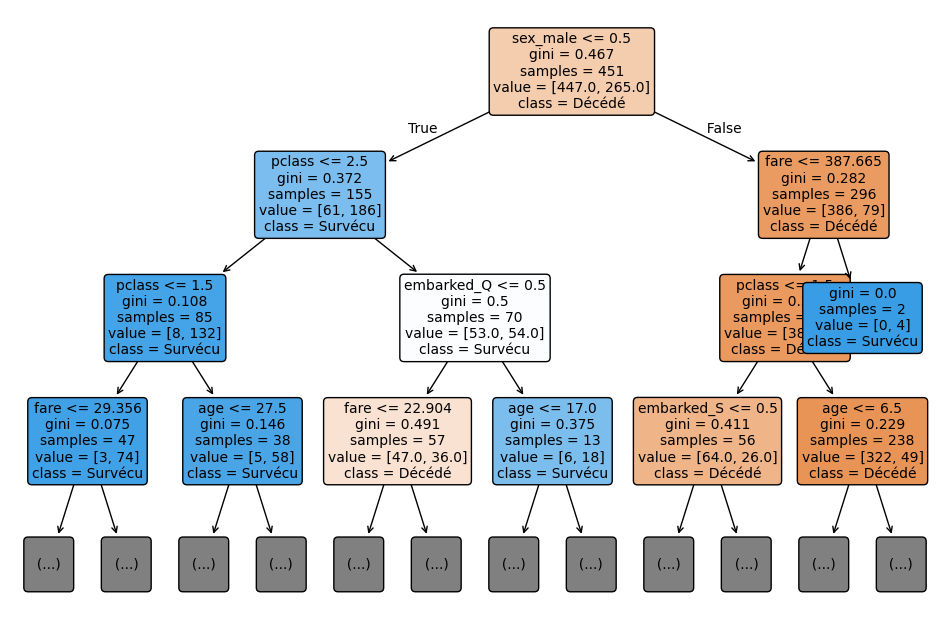

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[86 19]
 [17 57]]
Ne survivra pas


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
#Tintanic : Prédiction de la survie des passagers du Titanic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

# A. Charger le dataset
df = sns.load_dataset('titanic')  # charger Titanic
print(df.head())  # voir les 5 premières lignes
print(df.info())  # info sur les colonnes

# B. Exploration
print(df.isnull().sum())  # valeurs manquantes
print(df.describe())      # stats descriptives

# C. Visualisation
sns.countplot(x='survived', data=df)  # survivants vs décédés
plt.show()
sns.barplot(x='sex', y='survived', data=df)  # survie par sexe
plt.show()
sns.barplot(x='pclass', y='survived', data=df)  # survie par classe
plt.show()

# D. Préparation
df['age'].fillna(df['age'].median(), inplace=True)       # remplacer âge manquant
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # remplacer port manquant
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)  # convertir en numérique

X = df[['pclass','age','fare','sex_male','embarked_Q','embarked_S']]  # variables
y = df['survived']  # cible 

# E. Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# F. Modèle
model = RandomForestClassifier(random_state=42)  # créer modèle
model.fit(X_train, y_train)  # entraîner

# Afficher petit arbre pour comprendre
plt.figure(figsize=(12,8))
tree.plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['Décédé','Survécu'],
               filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()

# G. Évaluation
y_pred = model.predict(X_test)  # prédire
print("Accuracy:", accuracy_score(y_test, y_pred))  # précision
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # erreurs

# H. Prédiction nouveau passager
new_passenger = np.array([[2,30,20,1,0,1]])  # exemple
prediction = model.predict(new_passenger)
print("Survivra" if prediction[0]==1 else "Ne survivra pas")  # résultat